Some basic information about `matplotlib` from various sources and a few examples of how to get things done.

Sources:
* [Real Python Guide to matplotlib](https://realpython.com/python-matplotlib-guide/)
* [Matplotlib: Pyplot By Example](http://queirozf.com/entries/matplotlib-pyplot-by-example)
* Examples of univariate and multivariate matplotlib plots, how to use them in pandas, some examples of styling and subplotting can be found in a couple of your notebooks on Kaggle.
* Pretty great graph library with code examples: [The Python Graph Gallery](https://python-graph-gallery.com/matplotlib/).
* A decision tree by the author of the Python Graph Gallery that helps you choose which kinds of plots to use for your data: [From Data To Viz](https://www.data-to-viz.com/).


# Overview of matplotlib


In [2]:
import matplotlib.pyplot as plt
import numpy as np

A plot is comprised of a hierachy of objects. The outermost object is a `Figure`, which serves as a container for one or more `Axes` objects. The `Axes` objects represent the actual plots. Within the `Axes` object, there are `Axis` objects, labels, tick marks, plot lines, legends, titles and so on. 

matplotlib.figure.Figure

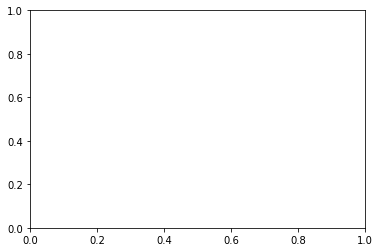

In [3]:
fig, _ = plt.subplots()
type(fig)

In [4]:
one_tick = fig.axes[0].yaxis.get_major_ticks()[0]
type(one_tick)

matplotlib.axis.YTick

From the matplotlib documentation [anatomy of a figure](https://matplotlib.org/examples/showcase/anatomy.html)

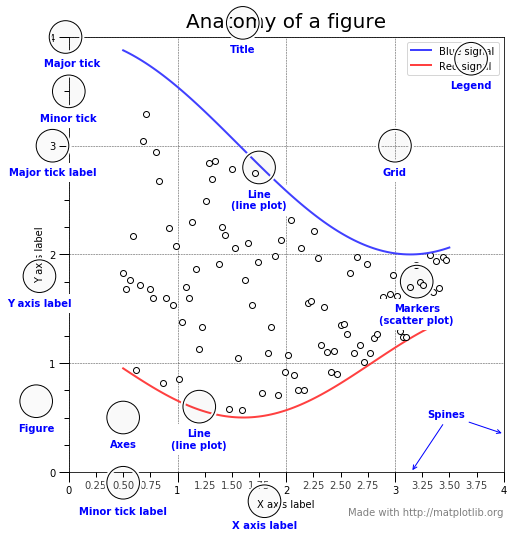

In [5]:
# This figure shows the name of several matplotlib elements composing a figure

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator, MultipleLocator, FuncFormatter


np.random.seed(19680801)

X = np.linspace(0.5, 3.5, 100)
Y1 = 3+np.cos(X)
Y2 = 1+np.cos(1+X/0.75)/2
Y3 = np.random.uniform(Y1, Y2, len(X))

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(1, 1, 1, aspect=1)


def minor_tick(x, pos):
    if not x % 1.0:
        return ""
    return "%.2f" % x

ax.xaxis.set_major_locator(MultipleLocator(1.000))
ax.xaxis.set_minor_locator(AutoMinorLocator(4))
ax.yaxis.set_major_locator(MultipleLocator(1.000))
ax.yaxis.set_minor_locator(AutoMinorLocator(4))
ax.xaxis.set_minor_formatter(FuncFormatter(minor_tick))

ax.set_xlim(0, 4)
ax.set_ylim(0, 4)

ax.tick_params(which='major', width=1.0)
ax.tick_params(which='major', length=10)
ax.tick_params(which='minor', width=1.0, labelsize=10)
ax.tick_params(which='minor', length=5, labelsize=10, labelcolor='0.25')

ax.grid(linestyle="--", linewidth=0.5, color='.25', zorder=-10)

ax.plot(X, Y1, c=(0.25, 0.25, 1.00), lw=2, label="Blue signal", zorder=10)
ax.plot(X, Y2, c=(1.00, 0.25, 0.25), lw=2, label="Red signal")
ax.plot(X, Y3, linewidth=0,
        marker='o', markerfacecolor='w', markeredgecolor='k')

ax.set_title("Anatomy of a figure", fontsize=20, verticalalignment='bottom')
ax.set_xlabel("X axis label")
ax.set_ylabel("Y axis label")

ax.legend()


def circle(x, y, radius=0.15):
    from matplotlib.patches import Circle
    from matplotlib.patheffects import withStroke
    circle = Circle((x, y), radius, clip_on=False, zorder=10, linewidth=1,
                    edgecolor='black', facecolor=(0, 0, 0, .0125),
                    path_effects=[withStroke(linewidth=5, foreground='w')])
    ax.add_artist(circle)


def text(x, y, text):
    ax.text(x, y, text, backgroundcolor="white",
            ha='center', va='top', weight='bold', color='blue')


# Minor tick
circle(0.50, -0.10)
text(0.50, -0.32, "Minor tick label")

# Major tick
circle(-0.03, 4.00)
text(0.03, 3.80, "Major tick")

# Minor tick
circle(0.00, 3.50)
text(0.00, 3.30, "Minor tick")

# Major tick label
circle(-0.15, 3.00)
text(-0.15, 2.80, "Major tick label")

# X Label
circle(1.80, -0.27)
text(1.80, -0.45, "X axis label")

# Y Label
circle(-0.27, 1.80)
text(-0.27, 1.6, "Y axis label")

# Title
circle(1.60, 4.13)
text(1.60, 3.93, "Title")

# Blue plot
circle(1.75, 2.80)
text(1.75, 2.60, "Line\n(line plot)")

# Red plot
circle(1.20, 0.60)
text(1.20, 0.40, "Line\n(line plot)")

# Scatter plot
circle(3.20, 1.75)
text(3.20, 1.55, "Markers\n(scatter plot)")

# Grid
circle(3.00, 3.00)
text(3.00, 2.80, "Grid")

# Legend
circle(3.70, 3.80)
text(3.70, 3.60, "Legend")

# Axes
circle(0.5, 0.5)
text(0.5, 0.3, "Axes")

# Figure
circle(-0.3, 0.65)
text(-0.3, 0.45, "Figure")

color = 'blue'
ax.annotate('Spines', xy=(4.0, 0.35), xycoords='data',
            xytext=(3.3, 0.5), textcoords='data',
            weight='bold', color=color,
            arrowprops=dict(arrowstyle='->',
                            connectionstyle="arc3",
                            color=color))

ax.annotate('', xy=(3.15, 0.0), xycoords='data',
            xytext=(3.45, 0.45), textcoords='data',
            weight='bold', color=color,
            arrowprops=dict(arrowstyle='->',
                            connectionstyle="arc3",
                            color=color))

ax.text(4.0, -0.4, "Made with http://matplotlib.org",
        fontsize=10, ha="right", color='.5')

plt.show()

<span style="color:red">*Not sure I got the difference between the two types of interfaces right*</span>

There is a *stateful* interface and a *stateless* or *object-oriented* interface. The stateful interface makes use of `plt.plot()` to implicitly refer ot the current `Figure` and its current `Axes`.

So when you call `plt.plot()` you are invoking the `plot()` method on the current Axes of the current Figure. Similarly, when calling `plt.title()`, you are making use of `ax.set_title()` and `ax.get_title()`. 
The same is true for the implementations of `plt.grid()`, `plot.legend()` and so on.

For example, `plt.title()` results in the following invocation under the hood: `gca().set_title(s, *args, **kwargs)`:
* `gca()` grabs the current `Axes` and returns it. 
* `set_title()` is a setter method that sets the title for the `Axes` object retrieved by `gca()`.

`gca()` and `gcf` are part of the stateless / object-oriented interface. For example:
* `ax = plt.gca()` to get teh current `Axes` object.
* `fig = plt.gcf().gca()` to get the current `Axes` of the current `Figure`.

Stateful example:
```python
plt.figure()
plt.plot([0, 1], [1, 0])
```
Stateless example that achieves the same, but does so explicitly:
```python
fig = plt.figure()
ax = fig.add_subplot(111)
li = ax.plot([0, 1], [1, 0])
```

Behind the scenes, `matplotlib` keeps track of the Figures for you. 

4754404016

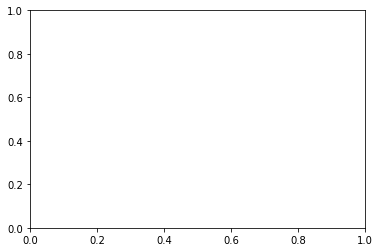

In [6]:
# note the memory address of fig1
fig1, ax1 = plt.subplots()
id(fig1)

In [7]:
# same memory location
id(plt.gcf())

4758318944

<Figure size 432x288 with 0 Axes>

4758395592

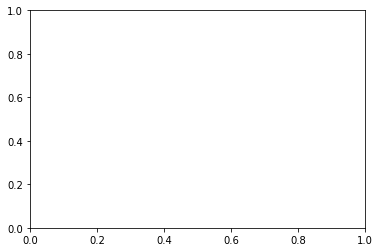

In [8]:
# a different Figure object that should probably find its home at a new location in memory
fig2, ax2 = plt.subplots()
id(fig2)

In [9]:
id(fig2) == id(plt.gcf())

False

<Figure size 432x288 with 0 Axes>

In [10]:
# get list of Figures
plt.get_fignums()
plt.figure(3)

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [11]:
# get all Figure objects that are currently held in memory by matplotlib
def get_all_figures():
    return [plt.figure(i) for i in plt.get_fignums()]

In [12]:
get_all_figures()

[]

You can explicitly close `Figure`s to avoid wasting memory on them. Use `plt.close()` to close the current `Figure` and `plt.close(num)` to close the `Figure` with the corresponding number. Use `plt.close("all")` to close all `Figure` windows.

# How to enable interactive matplotlib

You can switch interactive mode on or off as follows. For using interactive mode in Jupyter notebooks, either start your notebook server with `jupyter notebook --matplotlib inline` or using this magic command: `%matplotlib <backend>`, where common values for backend are `gtk`, `qt`, `notebook`.

In [20]:
plt.ioff()
plt.rcParams["interactive"]

False

In [21]:
plt.ion()
plt.rcParams["interactive"]

True

In [22]:
%matplotlib notebook

# Configuring matplotlib

The `plt.rcParams` object is a mutable dictionary of matplotlib settings that allows you to manipulate their values. 

* `plt.rcdefaults()` restores the rc parameters to matplotlib defaults. The default values are listed in `plt.rcParamsDefault`.
* Use `plt.rc()` to set configuration parameters interactively.

In [35]:
# one way to set configuration parameters
plt.rc("lines", linewidth=2, color="r")

# a second way
plt.rcParams["lines.linewidth"] = 2
plt.rcParams["lines.color"] = "r"

plt.rcdefaults()

# Configuring styles

In [36]:
# list available styles
plt.style.available

['seaborn-dark',
 'seaborn-darkgrid',
 'seaborn-ticks',
 'fivethirtyeight',
 'seaborn-whitegrid',
 'classic',
 '_classic_test',
 'fast',
 'seaborn-talk',
 'seaborn-dark-palette',
 'seaborn-bright',
 'seaborn-pastel',
 'grayscale',
 'seaborn-notebook',
 'ggplot',
 'seaborn-colorblind',
 'seaborn-muted',
 'seaborn',
 'Solarize_Light2',
 'seaborn-paper',
 'bmh',
 'tableau-colorblind10',
 'seaborn-white',
 'dark_background',
 'seaborn-poster',
 'seaborn-deep']

In [37]:
# set a style
plt.style.use("fivethirtyeight")


# Basic usage of `plt.subplots()`

Create a Figure and an Axes:

fig: <class 'matplotlib.figure.Figure'>
ax: <class 'matplotlib.axes._subplots.AxesSubplot'>


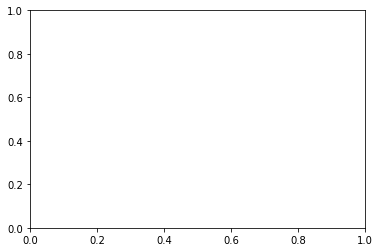

In [3]:
fig, ax = plt.subplots(nrows=1, ncols=1)  # default values
print(f"fig: {type(fig)}")
print(f"ax: {type(ax)}")

# Modifying the `Axes` returned by `plt.subplots()`

One `Axes` object.

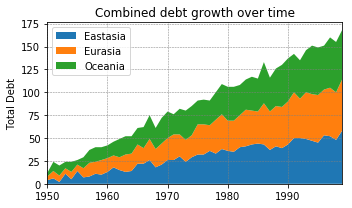

In [14]:
# Generate integers in the range [0, 50) evenly spaced by 1
rng = np.arange(50)
# Randomly generate integers in the range [0, 10). Generate 3 * rng.size numbers (i.e. 50).
# Create 3 time series.
rnd = np.random.randint(0, 10, size=(3, rng.size))  
yrs = 1950 + rng

# Create a Figure and AxesSubplot with the width and height given in the figsize tuple
fig, ax = plt.subplots(figsize=(5, 3))
# Use the AxesSubplot to create a stacked plot
# x is yrs, y is rng + rnd, define a label for each of the three timeseries we created
ax.stackplot(yrs, rng + rnd, labels=["Eastasia", "Eurasia", "Oceania"])
ax.set_title("Combined debt growth over time")
ax.legend(loc="upper left")
ax.set_ylabel("Total Debt")
# You can use set_xlim to modify the limits over values used on the x-axis.
# Try commenting this line out to see the effect.
ax.set_xlim(left=yrs[0], right=yrs[-1])
# Set up grid lines.
ax.grid(linestyle="--", linewidth=0.5, color="0.50")
# Adjust whitespace and other parameters to make the subplot fit nicely in the figure.
fig.tight_layout()

In [15]:
yrs = 1950 + rng
yrs

array([1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960,
       1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971,
       1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982,
       1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993,
       1994, 1995, 1996, 1997, 1998, 1999])

# Modifying multiple `Axes` objects generated by `plt.subplots()`

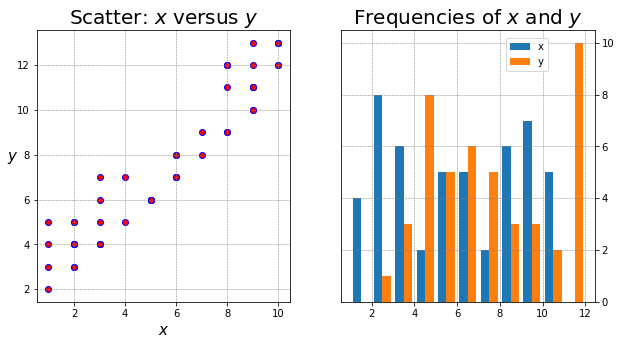

In [16]:
# An example of dealing with different Axes objects separately. 
# Generate 50 random integers in the range [1, 11)
x = np.random.randint(low=1, high=11, size=50)
# For each random number, generate a new number that is the sum of the number and a random
# number in the range [1, 5)
y = x + np.random.randint(low=1, high=5, size=x.size)
# Stack the two 1-D arrays as columns in a 2-D array
data = np.column_stack((x, y))
# Subplot consisting of two Axes arranged in a single row with two columns. The method
# returns a Figure and an array of Axes objects.
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

ax1.scatter(x=x, y=y, marker="o", c="r", edgecolor="b")
ax1.set_title("Scatter: $x$ versus $y$", fontsize=20)
ax1.set_xlabel("$x$", rotation=0, fontsize=15)
ax1.set_ylabel("$y$", rotation=0, fontsize=15)
ax1.grid(linestyle="--", linewidth=0.5, color="0.50")

ax2.hist(data, bins=np.arange(data.min(), data.max()), label=("x", "y"))
ax2.legend(loc=(0.65, 0.85))
ax2.set_title("Frequencies of $x$ and $y$", fontsize=20)
ax2.yaxis.tick_right()
ax2.grid(linestyle="--", linewidth=0.5, color="0.50")

In [17]:
(fig.axes[0] is ax1, fig.axes[1] is ax2)

(True, True)

# Multi-dimensional subplots

<class 'numpy.ndarray'>
[[<matplotlib.axes._subplots.AxesSubplot object at 0x11b6ce6a0>
(2, 2)


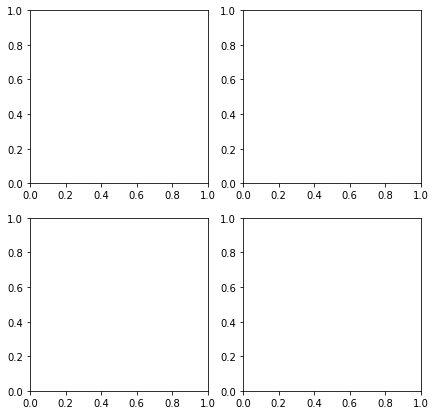

In [18]:
# In the following example, ax is a 2-D array of Axes objects.
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(7, 7))
print(type(ax))
print(ax)
print(ax.shape)

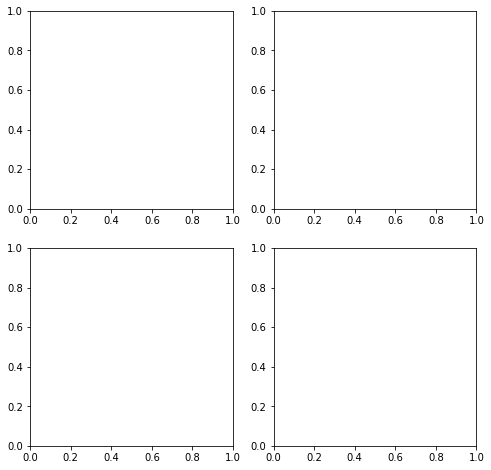

In [19]:
# A convenient way of unpacking multiple Axes objects:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(8, 8))
ax1, ax2, ax3, ax4 = ax.flatten()

# Achieving more fine-grained control over `subplots` using`gridspec`

matplotlib's [gridspec API](https://matplotlib.org/api/gridspec_api.html) allows us to customise subplots in more detail. It works as follows. First, you create a subplot with the desired number of rows and columns. Next, you use `subplot2grid` to specify, for each subplot, the location within the grid and size.

In [12]:
# A function to draw a text box inside an Axes
def add_textbox(ax, text):
    ax.text(0.5, 0.5,
           text,
           horizontalalignment="center",
           transform=ax.transAxes,
           bbox=dict(facecolor="blue", alpha=0.2),
           fontsize=12)
    return ax

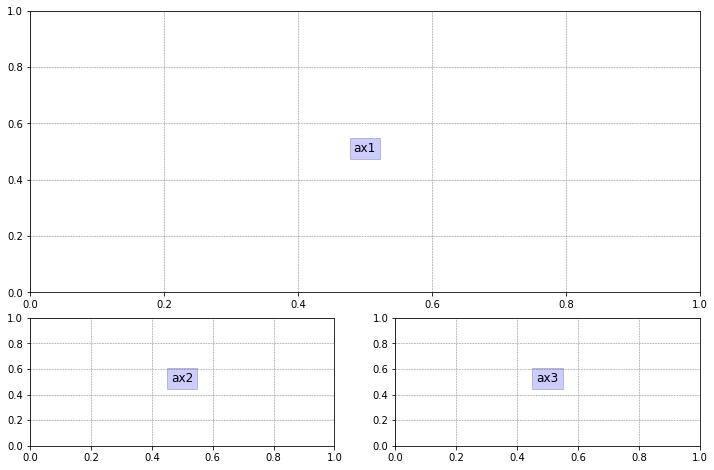

In [13]:
# a grid of three rows and two columns
gridsize = (3, 2)
fig = plt.figure(figsize=(12, 8))

# ax1 is in row 0, col 0 and spans 2 rows and 2 cols
ax1 = plt.subplot2grid(gridsize, (0, 0), colspan=2, rowspan=2)
add_textbox(ax1, "ax1")
ax1.grid(linestyle="--", linewidth=0.5, color="0.50")

# ax2 is in row 2 and col 0 and spans a single row and column
ax2 = plt.subplot2grid(gridsize, (2, 0))
add_textbox(ax2, "ax2")
ax2.grid(linestyle="--", linewidth=0.5, color="0.50")

# ax3 is in row 2 and col 1 and spans a single row and column
ax3 = plt.subplot2grid(gridsize, (2, 1))
add_textbox(ax3, "ax3")
ax3.grid(linestyle="--", linewidth=0.5, color="0.50")

An example to put it all together.

The colouring of points in the scatter points works by specifying which values to use to assign colours from a `ColorMap` to. An overview of the various colour maps can be found here: [colormaps_reference.py](https://matplotlib.org/examples/color/colormaps_reference.html).

In [14]:
from io import BytesIO
import tarfile
from urllib.request import urlopen

url = 'http://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.tgz'
b = BytesIO(urlopen(url).read())
fpath = 'CaliforniaHousing/cal_housing.data'

with tarfile.open(mode='r', fileobj=b) as archive:
    housing = np.loadtxt(archive.extractfile(fpath), delimiter=',')

In [15]:
house_prices = housing[:, -1]
pop, age = housing[:, [4, 7]].T
house_prices

array([452600., 358500., 352100., ...,  92300.,  84700.,  89400.])

Text(0.5, 0.98, 'Fun')

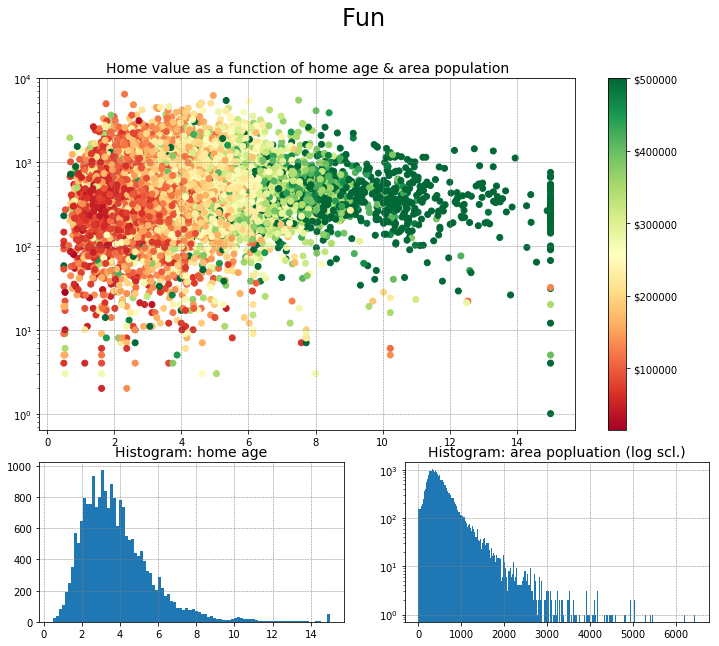

In [16]:
# a grid of three rows and two columns
gridsize = (3, 2)
fig = plt.figure(figsize=(12, 10))

ax1 = plt.subplot2grid(gridsize, (0, 0), colspan=2, rowspan=2)
ax1.grid(linestyle="--", linewidth=0.5, color="0.50")
ax1.set_title("Home value as a function of home age & area population", fontsize=14)
# A scatter plot mapping house price values to a ColorMap. Each data point is assigned a 
# colour according to the mapping from its house price to a colour from the ColorMap.
sctr = ax1.scatter(x=age, y=pop, c=house_prices, cmap="RdYlGn")
plt.colorbar(sctr, ax=ax1, format="$%d")
ax1.set_yscale("log")

ax2 = plt.subplot2grid(gridsize, (2, 0))
ax2.grid(linestyle="--", linewidth=0.5, color="0.50")
ax2.set_title("Histogram: home age", fontsize=14)
ax2.hist(age, bins="auto")

ax3 = plt.subplot2grid(gridsize, (2, 1))
ax3.grid(linestyle="--", linewidth=0.5, color="0.50")
ax3.set_title("Histogram: area popluation (log scl.)", fontsize=14)
ax3.hist(pop, bins="auto", log=True)

fig.suptitle("Fun", fontsize=24)

For an explanation of how colouring the points in a scatter plot works, see this answer on stackoverflow [How does parameters 'c' and 'cmap' behave in a matplotlib scatter plot?](https://stackoverflow.com/questions/52108558/how-does-parameters-c-and-cmap-behave-in-a-matplotlib-scatter-plot).

# Adjust spacing between subplots

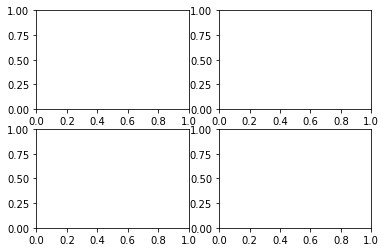

In [4]:
fig, axes = plt.subplots(2, 2)

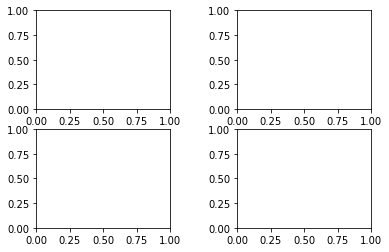

In [6]:
fig, axes = plt.subplots(2, 2)
plt.subplots_adjust(wspace=0.5)

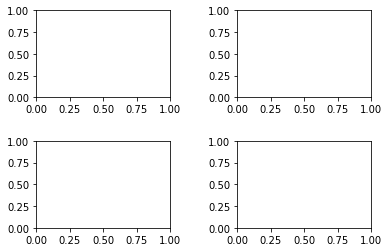

In [9]:
fig, axes = plt.subplots(2, 2)
plt.subplots_adjust(wspace=0.5, hspace=0.5)

# Set rotation of Axes and tick labels

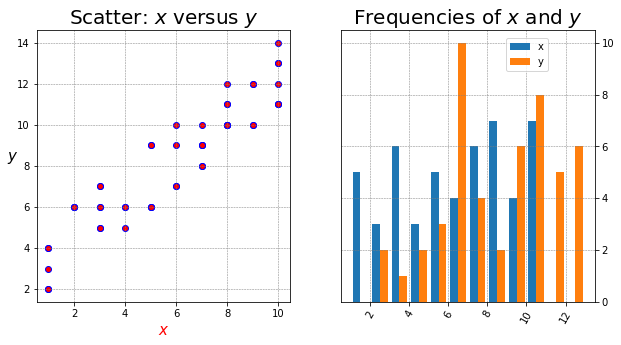

In [24]:
# An example of dealing with different Axes objects separately. 
# Generate 50 random integers in the range [1, 11)
x = np.random.randint(low=1, high=11, size=50)
# For each random number, generate a new number that is the sum of the number and a random
# number in the range [1, 5)
y = x + np.random.randint(low=1, high=5, size=x.size)
# Stack the two 1-D arrays as columns in a 2-D array
data = np.column_stack((x, y))
# Subplot consisting of two Axes arranged in a single row with two columns. The method
# returns a Figure and an array of Axes objects.
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

ax1.scatter(x=x, y=y, marker="o", c="r", edgecolor="b")
ax1.set_title("Scatter: $x$ versus $y$", fontsize=20)
# no rotation of the Axes labels
ax1.set_xlabel("$x$", rotation=0, fontsize=15, color="red")
ax1.set_ylabel("$y$", rotation=0, fontsize=15)
# 60 degree rotation of the tick labels along the x-axis
plt.setp(ax2.xaxis.get_majorticklabels(), rotation=60)
ax1.grid(linestyle="--", linewidth=0.5, color="0.50")

ax2.hist(data, bins=np.arange(data.min(), data.max()), label=("x", "y"))
ax2.legend(loc=(0.65, 0.85))
ax2.set_title("Frequencies of $x$ and $y$", fontsize=20)
ax2.yaxis.tick_right()
ax2.grid(linestyle="--", linewidth=0.5, color="0.50")

# Labelling points in a plot

Text(0.5, 0.5, 'Test')

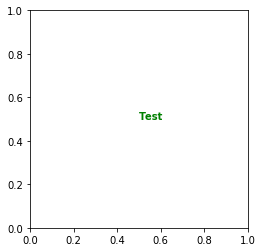

In [52]:
# Alternatively, you could simply call one of the plot methods (e.g., plt.bar())
fig = plt.figure(figsize=(4, 4))
ax = fig.add_subplot(1, 1, 1, aspect=1)
ax.annotate("Test",
            xy=(0.5, 0.5),
            xycoords="data",
            weight="bold",
            color="green"
           )

Another example:

In [100]:
def plot_value_labels(axis):
    rects = axis.patches
    
    for rect in rects:
        x_value = rect.get_x() + rect.get_width() / 2
        y_value = rect.get_height()
        label = "{:.2f}".format(y_value)
        va = "bottom"
        
        if y_value < 0:
            va = "top"
        
        axis.annotate(label,
                      xy=(x_value, y_value),
                      textcoords="offset points",
                      ha="center",
                      rotation=45,
                      va=va)

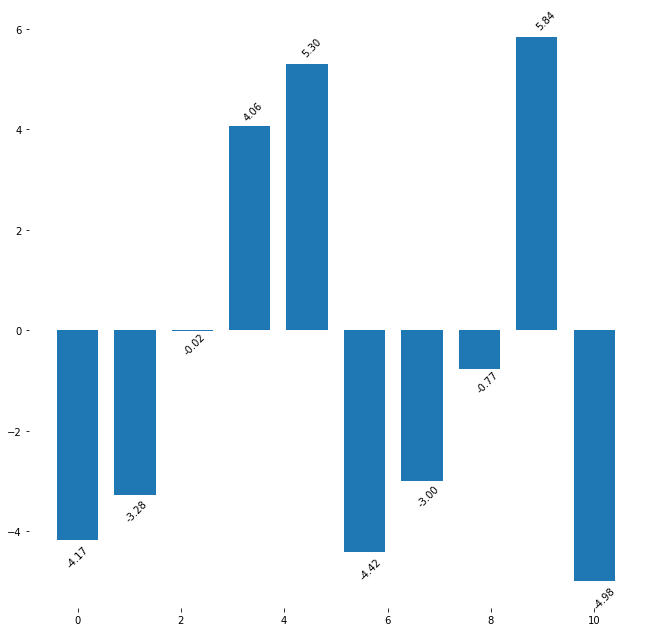

In [108]:
x = np.linspace(0, 10, 10)
y = np.random.uniform(low=-5, high=6, size=10)
fig, ax = plt.subplots(figsize=(11, 11))
# remove bounding box / frame, but leave Axes ticks on
plt.box(on=None)
plt.bar(x, y)

plot_value_labels(plt.gca())

# Setting tick frequency

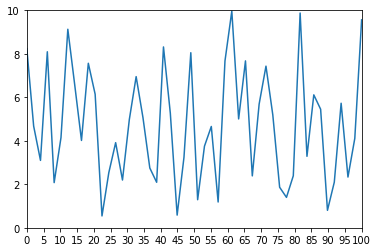

In [116]:
x = np.linspace(0.0,100,50)
y = np.random.uniform(low=0,high=10,size=50)
plt.plot(x,y)

plt.ylim(0,10)
plt.xlim(0,100)

# You can tell pyplot to write a x-axis tick every n units by setting
# a list of positions at which ticks should be placed.
n = 5
plt.xticks(ticks=np.arange(0, 105, n))
plt.show()

# Setting axis labels

([<matplotlib.axis.XTick at 0x11a6b9ef0>,
 <a list of 12 Text xticklabel objects>)

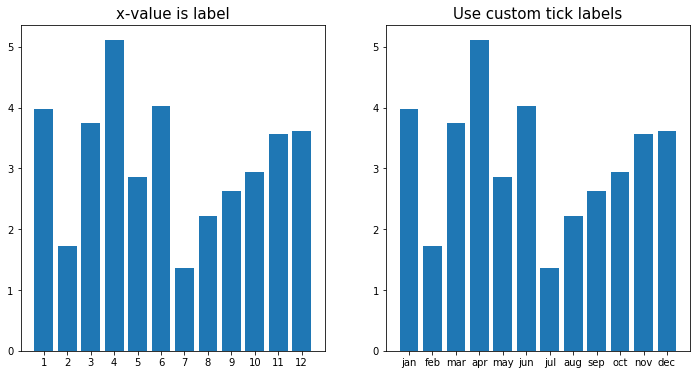

In [157]:
xs = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
ys = np.random.normal(loc=3, size=12)
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

ax1.set_title("x-value is label", fontsize=15)
ax1.set_xticks(ticks=np.arange(1, 13, 1))
ax1.bar(xs, ys)

ax2.set_title("Use custom tick labels", fontsize=15)
labels = ["jan", "feb", "mar", "apr", "may", "jun", "jul", "aug", "sep", "oct", "nov", "dec"]
#ax2.set_xticklabels(xs, labels=labels)
ax2.bar(xs, ys)
plt.xticks(xs, labels)

Setting tick labels along the y axis

([<matplotlib.axis.YTick at 0x11b0884e0>,
 <a list of 12 Text yticklabel objects>)

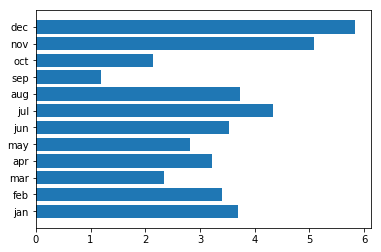

In [159]:
xs = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
ys = np.random.normal(loc=3, size=12)
labels = ["jan", "feb", "mar", "apr", "may", "jun", "jul", "aug", "sep", "oct", "nov", "dec"]
plt.barh(xs, ys)
plt.yticks(xs, labels)

# Creating twin plots

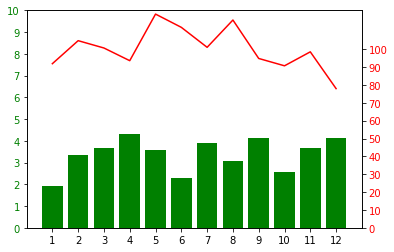

In [160]:
# generate sample data for this example
xs = [1,2,3,4,5,6,7,8,9,10,11,12]
ys_bars = np.random.normal(loc=3.0,size=12)
ys_lines = np.random.normal(loc=5.0,size=12,scale=0.5)

# this is the axis on the left
ax1=plt.gca()
ax1.bar(xs,ys_bars,color='green')

# order is important when setting ticks.
# Ticks must be set after the plot has been drawn
ax1.set_yticks(np.arange(0,11,1))
ax1.set_yticklabels(np.arange(0,11,1),color='green')

# create the 'twin' axis on the right
ax2=ax1.twinx()

# plot the same numbers but multiplied by 20
ax2.plot(xs,ys_lines*20,color='red')

# set the ticks and ticklabels for the twin axis
ax2.set_yticks(np.arange(0,101,10))
ax2.set_yticklabels(np.arange(0,101,10),color='red')

# set ticks for the common x axis (bottom)
ax2.xaxis.set_ticks(xs)

We can align the ticks of both axes, which is useful, if you want to display grid lines (that would be misaligned otherwise).

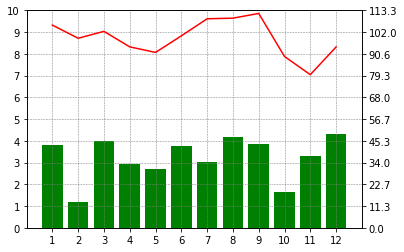

In [168]:
# generate sample data for this example
xs = [1,2,3,4,5,6,7,8,9,10,11,12]
ys_bars = np.random.normal(loc=3.0,size=12)
ys_lines = np.random.normal(loc=5.0,size=12,scale=0.5)

# this is the axis on the left
ax1=plt.gca()

ax1.bar(xs,ys_bars,color='green')

# order is important when setting ticks.
# Ticks must be set after the plot has been drawn
ax1.set_yticks(np.arange(0,11,1))

# define the number of ticks
NUM_TICKS=11

# change the tick locator for this axis and set the desired number of ticks
ax1.yaxis.set_major_locator(plt.LinearLocator(numticks=NUM_TICKS))

# create the 'twin' axis on the right
ax2=ax1.twinx()

# plot the same numbers but multiplied by 20
ax2.plot(xs,ys_lines*20,color='red')

# set the ticks for the twin axis
ax2.set_yticks(np.arange(0,101,10))

# change the tick locator for this axis and set the desired number of ticks
ax2.yaxis.set_major_locator(plt.LinearLocator(numticks=NUM_TICKS))

# set ticks for the common x axis (bottom)
ax2.xaxis.set_ticks(xs)

ax1.grid(linestyle="--", linewidth=0.5, color="0.50")

# Plotting methods

`matplotlib` offers a variety of plotting methods in addition to `Axes.plot`. [Plotting](https://matplotlib.org/api/axes_api.html?highlight=axes%20class#plotting).

In [29]:
# Create a matrix with the reversed values in the range from [2, 12) along the diagonal.
x = np.diag(np.arange(2, 12)[::-1])
# x:
# array([[11,  0,  0,  0,  0,  0,  0,  0,  0,  0],
#       [ 0, 10,  0,  0,  0,  0,  0,  0,  0,  0],
#       [ 0,  0,  9,  0,  0,  0,  0,  0,  0,  0],
#       [ 0,  0,  0,  8,  0,  0,  0,  0,  0,  0],
#       [ 0,  0,  0,  0,  7,  0,  0,  0,  0,  0],
#       [ 0,  0,  0,  0,  0,  6,  0,  0,  0,  0],
#       [ 0,  0,  0,  0,  0,  0,  5,  0,  0,  0],
#       [ 0,  0,  0,  0,  0,  0,  0,  4,  0,  0],
#       [ 0,  0,  0,  0,  0,  0,  0,  0,  3,  0],
#       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  2]])

In [30]:
# np.diag_indices_from(x[::-1]):
# (array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]))
# Two-dimensional index into the matrix represented by x. Reverse the order of numbers along the diagonal.
x[np.diag_indices_from(x[::-1])] = np.arange(2, 12)
# Create a second matrix by generating numbers in range [0, x.size) and reshaping this into a matrix.
# x2:
# array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9],
#       [10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
#       [20, 21, 22, 23, 24, 25, 26, 27, 28, 29],
#       [30, 31, 32, 33, 34, 35, 36, 37, 38, 39],
#       [40, 41, 42, 43, 44, 45, 46, 47, 48, 49],
#       [50, 51, 52, 53, 54, 55, 56, 57, 58, 59],
#       [60, 61, 62, 63, 64, 65, 66, 67, 68, 69],
#       [70, 71, 72, 73, 74, 75, 76, 77, 78, 79],
#       [80, 81, 82, 83, 84, 85, 86, 87, 88, 89],
#       [90, 91, 92, 93, 94, 95, 96, 97, 98, 99]])
x2 = np.arange(x.size).reshape(x.shape)

In [31]:
# Disable all axis labels.
sides = ("left", "right", "top", "bottom")
# nolabels: {'left': False, 'right': False, 'top': False, 'bottom': False}
nolabels = {s: False for s in sides}
nolabels.update({"label%s" % s: False for s in sides})
nolabels

{'left': False,
 'right': False,
 'top': False,
 'bottom': False,
 'labelleft': False,
 'labelright': False,
 'labeltop': False,
 'labelbottom': False}

I am amazed at what `matplotlib` makes possible within just a few lines of code...

<IPython.core.display.Javascript object>


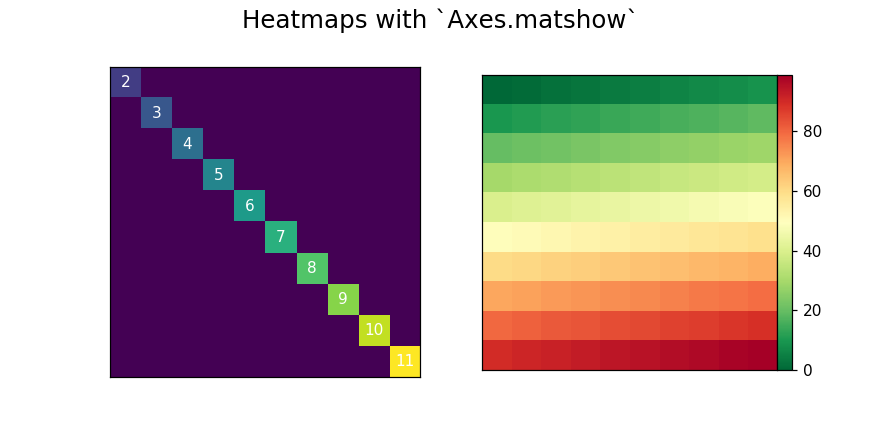

In [34]:
from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable

# Use context manager to disable Axes grid.
with plt.rc_context(rc={"axes.grid": False}):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4))
    ax1.matshow(x)
    img2 = ax2.matshow(x2, cmap="RdYlGn_r")
    
    for ax in (ax1, ax2):
        ax.tick_params(axis="both", which="both", **nolabels)
    
    for i, j in zip(*x.nonzero()):
        ax1.text(j, i, x[i, j], color="white", ha="center", va="center")
        
    divider = make_axes_locatable(ax2)
    cax = divider.append_axes("right", size="5%", pad=0)
    plt.colorbar(img2, cax=cax, ax=[ax1, ax2])
    # How to set the title for an entire figure
    fig.suptitle("Heatmaps with `Axes.matshow`", fontsize=16)

# Mixing pandas plotting with matplotlib internals

pandas plotting uses matplotlib under the covers, which means you can make use of `matplotlib` to customise your plots on `Series` and `DataFrames` by getting hold of the underlying `Figure` and `Axes`.